In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy import stats
import seaborn as sns

In [2]:
x=pd.read_csv('../_xlable4_withNa_AllColumns.txt')
y=pd.read_csv('../_targelable4_withNa_AllColumns.txt')

y=y[['Unnamed: 0','L190300']]

In [3]:
data= pd.merge(x,y, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
data['max']=np.min(data[['FIELD_6','FIELD_7']],axis=1)
data=data.drop(columns=['FIELD_6','FIELD_7'])

In [4]:
data=data.query('FIELD_15 !=1 and FIELD_17 !=1 and FIELD_22 != 1 and FIELD_24 != 1 and FIELD_16 != 1 and FIELD_23 != 1')
# data=data.query('FIELD_16 != 1 and FIELD_23 != 1')

In [5]:
# data=data[data.SEX==0]
# data=data[data.FIELD_15!=1]
# data=data[data.FIELD_17!=1]
# data=data[data.FIELD_22!=1]
# data=data[data.FIELD_24!=1]
# data=data[data.AGE>=40]
# data=data[data.AGE<50]

print(data.shape)

(159381, 408)


In [6]:
#split column types to categorical and numerical
numerical_cols = list(data.columns[~data.columns.str.startswith('FIELD')])
categorical_cols = list(data.columns[data.columns.str.startswith('FIELD')])

Calculate correlation Value - for numerical values
========

In [7]:
corr=data[numerical_cols].corr()
corr=corr.L190300_y
corrvalPD=pd.DataFrame()
corrvalPD['Col']=corr.index
corrvalPD['val']=abs(corr.values)

corrvalPD=corrvalPD.sort_values(by='val',ascending=False)
corrvalPD.head()

,Col,val
134,L393800,1.000000
278,L190300_y,1.000000
176,L511300,0.869595
93,L190300_x,0.854068
153,L501900,0.800859


In [8]:
#count of none NA values of feature set
mydataset=data.copy()[numerical_cols]
colCount=[]
for i in mydataset.columns:
    colCount.append([i,mydataset[i].dropna().shape[0]])

colCountPD=pd.DataFrame(colCount,columns=['Col','Count'])
colCountPD.head()

,Col,Count
0,Unnamed: 0,159381
1,index,159381
2,COMPARE,159381
3,AGE,159381
4,B_DAY,159381


In [9]:
mergedColCorrCount=pd.merge(corrvalPD,colCountPD,how='inner',left_on='Col',right_on='Col')
mergedColCorrCount=mergedColCorrCount[mergedColCorrCount.Count>50000]
mergedColCorrCount=mergedColCorrCount.sort_values(by='val', ascending=False)
mergedColCorrCount.head(20)

,Col,val,Count
1,L190300_y,1.000000,159192
3,L190300_x,0.854068,159204
6,L190500,0.735728,159204
7,L190400,0.721104,159241
9,SEX,0.664207,159381
14,S000100,0.496809,159302
15,L100700,0.481208,152474
16,L100500,0.479179,158954
25,S000300,0.379807,159075
26,L103300,0.379130,135222


In [10]:
print(list(mergedColCorrCount.head(20).Col))

['L190300_y', 'L190300_x', 'L190500', 'L190400', 'SEX', 'S000100', 'L100700', 'L100500', 'S000300', 'L103300', 'S000501', 'L103100', 'S000502', 'L101300', 'L103000', 'L101600', 'L190600', 'L101700', 'L107400', 'L100200']


Anova test - For categorical values [Questionnaire answers]
=======

In [11]:
mydataset=data.copy()[categorical_cols] #[np.insert(categorical_cols,0,'L100800')]

# mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39','FIELD_88',
#                            'FIELD_89','FIELD_109','FIELD_110','FIELD_111','FIELD_70','FIELD_82','FIELD_85','FIELD_91',
#                            'FIELD_103','FIELD_106'])

# mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
#                                   'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
#                                  'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
#                                  'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
#                                  'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
#                                   'FIELD_137','FIELD_138','FIELD_139','FIELD_140'])


mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
                                  'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
                                 'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
                                 'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
                                 'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
                                  'FIELD_137','FIELD_138','FIELD_139','FIELD_140',
                                  'FIELD_64','FIELD_65','FIELD_66','FIELD_67','FIELD_68','FIELD_69','FIELD_70','FIELD_72',
                                  'FIELD_73','FIELD_74','FIELD_75','FIELD_76','FIELD_77','FIELD_80','FIELD_81','FIELD_84',
                                  'FIELD_85','FIELD_90','FIELD_93','FIELD_94','FIELD_95','FIELD_96','FIELD_97','FIELD_98',
                                  'FIELD_101','FIELD_102','FIELD_105','FIELD_106','FIELD_112','FIELD_113','FIELD_114',
                                  'FIELD_115','FIELD_116','FIELD_117','FIELD_118','FIELD_119','FIELD_9'
                                 ])


mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='`'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='G'].index)


mydataset=mydataset.drop(mydataset[mydataset.FIELD_4=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_5=='.'].index)

mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='?'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_36=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_37=='\\'].index)
 
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '7+' ].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '5~7'].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '3-4'].index)


# mydataset=mydataset.drop(mydataset[mydataset.FIELD_95=='.'].index)

In [12]:
colslist=mydataset.columns
DiabeticColVals=data.L190300_y

cor=[]
pval=[]
count=[]

for i in range(len(colslist)):
    print(i,colslist[i])
    
    temp=pd.DataFrame([])
    temp['a']=DiabeticColVals
    temp['b']=mydataset[colslist[i]].astype(float)
    temp=temp.dropna()
    count.append(temp.shape[0])
    
    uniquevalues=temp.b.unique()
    
    selectedGroupVals=[]
    for k in range(len(uniquevalues)):
        selectedGroupVals.append(np.asarray(temp[temp['b']==uniquevalues[k]].a))

    F, p = stats.f_oneway(*selectedGroupVals)
    cor.append(F)
    pval.append(p)
    

0 FIELD_3
1 FIELD_4
2 FIELD_5
3 FIELD_13
4 FIELD_14
5 FIELD_15
6 FIELD_16
7 FIELD_17
8 FIELD_18
9 FIELD_19
10 FIELD_20
11 FIELD_21
12 FIELD_22
13 FIELD_23
14 FIELD_24
15 FIELD_25
16 FIELD_26
17 FIELD_27
18 FIELD_28
19 FIELD_29
20 FIELD_30
21 FIELD_31
22 FIELD_32
23 FIELD_33
24 FIELD_34
25 FIELD_35
26 FIELD_36
27 FIELD_37
28 FIELD_38
29 FIELD_40
30 FIELD_41
31 FIELD_42
32 FIELD_43
33 FIELD_44
34 FIELD_45
35 FIELD_46
36 FIELD_47
37 FIELD_48
38 FIELD_49
39 FIELD_50
40 FIELD_51
41 FIELD_52
42 FIELD_53
43 FIELD_54
44 FIELD_55
45 FIELD_56
46 FIELD_57
47 FIELD_58
48 FIELD_59
49 FIELD_60
50 FIELD_61
51 FIELD_62
52 FIELD_63


In [13]:
FvalPvalCorr=pd.DataFrame()    
FvalPvalCorr['Cols']=colslist
FvalPvalCorr['F']=cor
FvalPvalCorr['P']=pval
FvalPvalCorr['Count']=count
FvalPvalCorr=FvalPvalCorr.sort_values(by='F', ascending=False)


In [14]:
FvalPvalCorr[FvalPvalCorr.Count>50000].head(10)

,Cols,F,P,Count
23,FIELD_33,4964.044303,0.000000e+00,158879
28,FIELD_38,1070.883824,0.000000e+00,158887
29,FIELD_40,368.215496,0.000000e+00,158893
8,FIELD_18,263.524602,3.265370e-59,159174
15,FIELD_25,217.734052,3.042708e-49,159175
19,FIELD_29,183.058075,1.098596e-41,159174
30,FIELD_41,164.578913,1.292287e-243,158863
1,FIELD_4,86.455955,3.290966e-126,156773
31,FIELD_42,44.232545,1.642250e-71,158842
22,FIELD_32,23.229836,9.419573e-32,158679


In [15]:
print(list(FvalPvalCorr[FvalPvalCorr.Count>50000].Cols)[:10])

['FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_18', 'FIELD_25', 'FIELD_29', 'FIELD_41', 'FIELD_4', 'FIELD_42', 'FIELD_32']


========================= LASSO method
================

In [16]:
selectedcols=['L190300_y', 'L190300_x', 'L190500', 'L190400', 'SEX', 'S000100', 'L100700', 'L100500', 'S000300', 
              'L103300', 'S000501', 'L103100', 'S000502', 'L101300', 'L103000', 'L101600', 'L190600', 'L101700', 
              'L107400', 'L100200','FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_18', 'FIELD_25', 'FIELD_29', 
              'FIELD_41', 'FIELD_4', 'FIELD_42', 'FIELD_32'
             ]
data2=data[selectedcols].copy().dropna()
print(data2.shape)

(124360, 30)


In [17]:
x=data2[[ 'L190300_x', 'L190500', 'L190400', 'SEX', 'S000100', 'L100700', 'L100500', 'S000300', 
              'L103300', 'S000501', 'L103100', 'S000502', 'L101300', 'L103000', 'L101600', 'L190600', 'L101700', 
              'L107400', 'L100200','FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_18', 'FIELD_25', 'FIELD_29', 
              'FIELD_41', 'FIELD_4', 'FIELD_42', 'FIELD_32'
        ]]
y=data2.L190300_y

In [18]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x,y)

print(clf.coef_)

print(clf.intercept_)  

# pd.DataFrame([x.columns.ravel(),clf.coef_.ravel()],columns=['Name','coeff'])

lassod=pd.DataFrame()
lassod['Name']=x.columns
lassod['coeff']=clf.coef_
lassod

lassod=lassod.drop(lassod[lassod.coeff==0].index)
lassod.coeff=abs(lassod.coeff)
lassod=lassod.sort_values(by='coeff', ascending=False)
lassod

[ 0.00000000e+00  7.28666401e-02  0.00000000e+00 -0.00000000e+00
  5.23049480e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.36611074e-03 -2.34110845e-03  0.00000000e+00
  3.66675153e-04  8.97018929e-05  9.76822660e-05 -3.52504188e-02
  1.24115201e-04 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
3.8193349484537316


,Name,coeff
1,L190500,0.072867
15,L190600,0.035250
4,S000100,0.005230
10,L103100,0.002341
9,S000501,0.001366
12,L101300,0.000367
16,L101700,0.000124
14,L101600,0.000098
13,L103000,0.000090


In [19]:
print(list(lassod.Name[:20]))

['L190500', 'L190600', 'S000100', 'L103100', 'S000501', 'L101300', 'L101700', 'L101600', 'L103000']


=============================== SelectKBest method
========================

In [20]:
# from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

# x=x[x.columns[:15]]
print(list(x.columns[:16]))

['L190300_x', 'L190500', 'L190400', 'SEX', 'S000100', 'L100700', 'L100500', 'S000300', 'L103300', 'S000501', 'L103100', 'S000502', 'L101300', 'L103000', 'L101600', 'L190600']


========================================= LinearSVC
===============

In [21]:
# from sklearn.svm import LinearSVC
# from sklearn.datasets import load_iris
# from sklearn.feature_selection import SelectFromModel

# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(x)
# X_new.shape

In [22]:
# x.dtypes

================================ SequentialFeatureSelector 
================================

In [23]:
# from sklearn.linear_model import LinearRegression
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# from sklearn.ensemble import RandomForestRegressor

# lr = RandomForestRegressor()

# sfs = SFS(lr, 
#           k_features=13, 
#           forward=True, 
#           floating=False, 
#           scoring='neg_mean_squared_error',
#           cv=5)

# sfs = sfs.fit(x, y)
# fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

# plt.title('Sequential Forward Selection (w. StdErr)')
# plt.grid()
# plt.show()

================================= feature_importances
=====

[0.23961505 0.04507995 0.03719289 0.41756315 0.01003271 0.00986892
 0.01005768 0.01104495 0.00918536 0.01015695 0.01035475 0.00998569
 0.00928113 0.0097306  0.00966185 0.05587055 0.00862481 0.01015449
 0.01379744 0.00576808 0.00855763 0.00802577 0.00166254 0.00124006
 0.00441294 0.00825462 0.00843083 0.00924781 0.00714082]


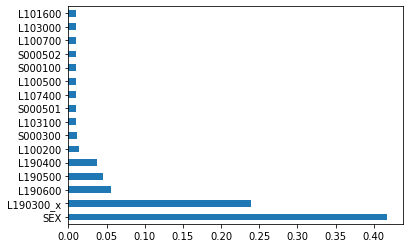

Index(['SEX', 'L190300_x', 'L190600', 'L190500', 'L190400', 'L100200',
       'S000300', 'L103100', 'S000501', 'L107400', 'L100500', 'S000100',
       'S000502', 'L100700', 'L103000', 'L101600'],
      dtype='object')


In [24]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

print(feat_importances.nlargest(16).index)

============================= Backward Elimination
========

In [25]:
import statsmodels.regression.linear_model as sm
temp=x.copy()
temp['const']=np.ones((x.shape[0],1))
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              L190300_y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 1.414e+04
Date:                Thu, 10 Oct 2019   Prob (F-statistic):               0.00
Time:                        02:57:27   Log-Likelihood:                 14288.
No. Observations:              124360   AIC:                        -2.852e+04
Df Residuals:                  124330   BIC:                        -2.822e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
L190300_x      0.7651      0.025     30.675      0.000       0.716       0.814
L190500       -0.0219      0.003     -7.988      0.000      -0.027      -0.016
L190400        0.0449      0.002     27.229      0.000       0.042       0.048
SEX           -0.1837      0.003    -64.828      0.000      -0.189      -0.178
S000100        0.0005      0.000      4.666      0.000       0.000       0.001
L100700       -0.0031      0.001     -4.787      0.000      -0.004      -0.002
L100500       -0.0681      0.005    -13.695      0.000      -0.078      -0.058
S000300        0.0027      0.000     10.964      0.000       0.002       0.003
L103300       -0.0016      0.001     -1.576      0.115      -0.004       0.000
S000501        0.0007   8.14e-05      8.601      0.000       0.001       0.001
L103100       -0.0007   7.66e-05     -8.701      0.000      -0.001      -0.001
S000502    -5.907e-05      0.000     -0.553      0.580      -0.000       0.000
L101300        0.0002   3.69e-05      4.277      0.000    8.56e-05       0.000
L103000     2.159e-06   9.36e-06      0.231      0.818   -1.62e-05    2.05e-05
L101600       -0.0001   4.45e-05     -3.232      0.001      -0.000   -5.66e-05
L190600       -0.0052      0.001     -4.180      0.000      -0.008      -0.003
L101700     1.692e-05   2.04e-05      0.830      0.406    -2.3e-05    5.69e-05
L107400       -0.0011      0.000     -6.168      0.000      -0.001      -0.001
L100200       -0.1197      0.003    -44.153      0.000      -0.125      -0.114
FIELD_33      -0.0002      0.001     -0.238      0.812      -0.002       0.002
FIELD_38      -0.0024      0.001     -4.212      0.000      -0.003      -0.001
FIELD_40       0.0018      0.001      3.407      0.001       0.001       0.003
FIELD_18      -0.0173      0.005     -3.193      0.001      -0.028      -0.007
FIELD_25       0.0080      0.007      1.230      0.219      -0.005       0.021
FIELD_29       0.0041      0.002      2.294      0.022       0.001       0.008
FIELD_41   -1.511e-05      0.001     -0.030      0.976      -0.001       0.001
FIELD_4        0.0014      0.001      2.796      0.005       0.000       0.002
FIELD_42       0.0012      0.000      3.977      0.000       0.001       0.002
FIELD_32       0.0043      0.001      4.039      0.000       0.002       0.006
const          2.3546      0.117     20.152      0.000       2.126       2.584
==============================================================================
Omnibus:                     3224.349   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7879.789
Skew:                           0.047   Prob(JB):                         0.00
Kurtosis:                       4.230   Cond. No.                     5.57e+04
==============================================================================

W

In [26]:
# temp=temp.drop(columns=['L103100', 'S000300','L190400','L102900','L101300','S000501','S000502','L100500','FIELD_40',
#                         'FIELD_41','FIELD_29','FIELD_18','FIELD_31','FIELD_27','FIELD_25','SEX'])
# regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
# regressor_OLS.summary()

In [27]:
# temp=temp.drop(columns=['FIELD_33'])
# regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
# regressor_OLS.summary()

In [28]:
print(temp.columns.shape)
temp.columns

(30,)


Index(['L190300_x', 'L190500', 'L190400', 'SEX', 'S000100', 'L100700',
       'L100500', 'S000300', 'L103300', 'S000501', 'L103100', 'S000502',
       'L101300', 'L103000', 'L101600', 'L190600', 'L101700', 'L107400',
       'L100200', 'FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_18', 'FIELD_25',
       'FIELD_29', 'FIELD_41', 'FIELD_4', 'FIELD_42', 'FIELD_32', 'const'],
      dtype='object')

================== Check Variance inflation factor and multi collinearity
==================== 

In [29]:
temppd=pd.DataFrame(data2[['S000501_x', 'S000502', 'S000300', 'SEX', 'L190400', 'L190300', 'L190500', 'L100700', 
              'L103300', 'L100500', 'S000100', 'L100800', 'L103000', 'L101700', 'L101300', 'L103100', 'max',
              'FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_29', 'FIELD_41', 'FIELD_27', 'FIELD_42', 'FIELD_5', 
              'FIELD_18', 'FIELD_25'
                          ]]).dropna()  
temppd['y']=data.S000501_y
 

corr = (temppd.corr())
sns.heatmap(corr, vmin=-1, vmax=1) 

corr.head(20)

KeyError: "['max', 'FIELD_27', 'L190300', 'L100800', 'S000501_x', 'FIELD_5'] not in index"

In [ ]:

def vifcal(inputdata,depcol):
    vifL5=[]
    import statsmodels.formula.api as sm
    xvars=inputdata.drop([depcol],axis=1)
    xvarnames=xvars.columns
    for i in range(0,xvarnames.shape[0]):
        _y=xvars[xvarnames[i]]
        _x=xvars[xvarnames.drop(xvarnames[i])]
        rsq=sm.ols(formula="_y~_x",data=xvars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print(i,', ',xvarnames[i]," VIF = ",vif)
        if(vif<5):
            vifL5.append(xvarnames[i])
    return vifL5
    
    
newcols = vifcal(temppd,'y')

In [ ]:
print(newcols,len(newcols))